# Analysis of Best Markets for E-Learning Advertisement

* The goal of this project is to find the best markets to target for advertising our e-learning course product(s)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


The below survey was chosen to analyze based on target audience (new coders with varying interests) size and makeup which matches the audience our e-learning company wishes to reach.
* We chose this data set instead of performing a new survey in the interest of saving time and money
* This data set is a collection of 18174 survey participants answers for 136 questions 
* This data set can be downloaded at https://github.com/freeCodeCamp/2017-new-coder-survey

In [2]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)

In [3]:
survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
survey.shape

(18175, 136)

In [5]:
list(survey.columns)[:15]

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup']

We will target JobRoleInterest column for analysis since this column describes the role(s) the participant is interested in.

In [6]:
survey['JobRoleInterest'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.8%
  Front-End Web Developer                                                                                                                                                                                                                                                    6.4%
  Data Scientist                                                                                                                                                                                                                                                             2.2%
Back-End Web Developer                                                                                                                                                            

Observations:
* Participants can be interested in more than one subject
* The sample is still representative if they are interested in more than one subject


In [7]:
survey['Interests'] = survey['JobRoleInterest'].apply(lambda x: 'Multiple' if ',' in str(x) else 'Single')

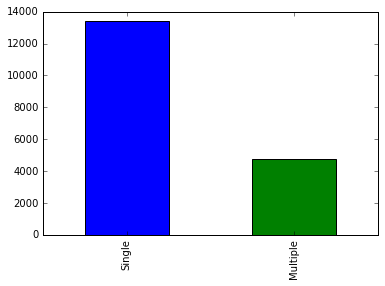

In [8]:
%matplotlib inline
survey['Interests'].value_counts().plot.bar()

In [9]:
survey['WebOrMobile'] = survey['JobRoleInterest'].apply(lambda x: True if 'Web Developer' in str(x) or 'Mobile Developer' in str(x) else False)

In [10]:
survey['WebOrMobile'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

False    66.8%
True     33.2%
Name: WebOrMobile, dtype: object

Based on the above, 33% are interested in either Web or Mobile Development

* Removing rows that have no response to JobRoleInterest question

In [11]:
survey = survey.dropna(subset=['JobRoleInterest'])

In [12]:
survey['CountryLive'].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Philippines                        52
Serbia                             52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Croatia     

In [13]:
survey['CountryLive'].value_counts(normalize=True).mul(100).round(1).astype(str) + "%"

United States of America         45.7%
India                             7.7%
United Kingdom                    4.6%
Canada                            3.8%
Poland                            1.9%
Brazil                            1.9%
Germany                           1.8%
Australia                         1.6%
Russia                            1.5%
Ukraine                           1.3%
Nigeria                           1.2%
Spain                             1.1%
France                            1.1%
Romania                           1.0%
Netherlands (Holland, Europe)     1.0%
Italy                             0.9%
Philippines                       0.8%
Serbia                            0.8%
Greece                            0.7%
Ireland                           0.6%
South Africa                      0.6%
Mexico                            0.5%
Turkey                            0.5%
Hungary                           0.5%
Singapore                         0.5%
New Zealand              

* Based on the counts/percentages above, I would recommend focusing the advertisements in the U.S. and India.

* We will change any 0 values for MonthsProgramming to 1 to avoid division by zero for the MoneySpentPerMonth column we are creating

In [14]:
survey.loc[(survey['MonthsProgramming'] == 0),'MonthsProgramming'] = 1

In [15]:
survey['MoneySpentPerMonth'] = survey['MoneyForLearning'] / survey['MonthsProgramming']

In [16]:
survey['MoneySpentPerMonth'].value_counts(dropna=False)

 0.000000        3092
NaN               675
 50.000000        128
 25.000000        120
 16.666667        118
 100.000000       118
 33.333333        109
 8.333333         105
 20.000000         88
 10.000000         83
 83.333333         80
 166.666667        67
 12.500000         66
 4.166667          65
 5.000000          62
 200.000000        53
 500.000000        50
 66.666667         47
 41.666667         46
 250.000000        44
 1000.000000       43
 3.333333          38
 20.833333         37
 125.000000        36
 6.666667          35
 2.500000          33
 5.555556          31
 150.000000        31
 333.333333        31
 11.111111         31
                 ... 
 1.562500           1
 29.000000          1
 23.000000          1
 19.000000          1
 31.000000          1
 3.625000           1
 4.750000           1
 92.000000          1
 117.500000         1
 4.687500           1
 1142.857143        1
 0.900000           1
 866.666667         1
 1.344086           1
 1670.0000

* Dropping rows where Null is in the MoneySpentPerMonth column

In [17]:
survey = survey.dropna(subset=['MoneySpentPerMonth'])

In [26]:
survey = survey.dropna(subset=['CountryLive'])
survey_tgt = survey.query('CountryLive=="United States of America" or CountryLive=="United Kingdom" or CountryLive=="India" or CountryLive=="Canada"')

In [29]:
survey_tgt['CountryLive'].head()

1     United States of America
2     United States of America
6               United Kingdom
15    United States of America
16    United States of America
Name: CountryLive, dtype: object

In [38]:
survey_tgt.groupby(['CountryLive'])[['MoneySpentPerMonth']].mean()

,MoneySpentPerMonth
CountryLive,
Canada,113.510961
India,135.100982
United Kingdom,45.534443
United States of America,227.997996


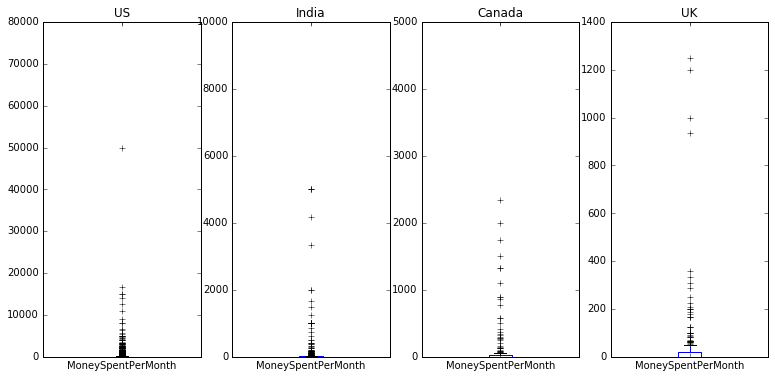

In [47]:
india = survey_tgt[survey_tgt['CountryLive']=='India']
uk = survey_tgt[survey_tgt['CountryLive']=='United Kingdom']
us = survey_tgt[survey_tgt['CountryLive']=='United States of America']
ca = survey_tgt[survey_tgt['CountryLive']=='Canada']

plt.figure(figsize=(13,6))
plt.subplot(1,4,1)
us['MoneySpentPerMonth'].plot.box()
plt.title('US')
plt.subplot(1,4,2)
india['MoneySpentPerMonth'].plot.box()
plt.title('India')
plt.subplot(1,4,3)
ca['MoneySpentPerMonth'].plot.box()
plt.title('Canada')
plt.subplot(1,4,4)
uk['MoneySpentPerMonth'].plot.box()
plt.title('UK')

### Removing extreme outliers!

In [57]:
survey_adj = survey_tgt.copy()
survey_adj.drop(survey_adj[(survey_adj['CountryLive']=='India') & (survey_adj['MoneySpentPerMonth']>4000)].index, inplace=True)

In [60]:
survey_adj.drop(survey_adj[(survey_adj['CountryLive']=='Canada') & (survey_adj['MoneySpentPerMonth']>3000)].index, inplace=True)

In [62]:
survey_adj.drop(survey_adj[(survey_adj['CountryLive']=='United Kingdom') & (survey_adj['MoneySpentPerMonth']>800)].index, inplace=True)

In [64]:
survey_adj.drop(survey_adj[(survey_adj['CountryLive']=='United States of America') & (survey_adj['MoneySpentPerMonth']>20000)].index,inplace=True)

#### New Breakdown after Outlier Removal

In [68]:
survey_adj.groupby(['CountryLive'])[['MoneySpentPerMonth']].mean()

,MoneySpentPerMonth
CountryLive,
Canada,93.065400
India,72.893205
United Kingdom,25.245838
United States of America,183.800110


### Conclusion

* Based on the above breakdown, I would recommend advertising in the U.S. and Canada.  Based on the target price of $59 per month especially.  It may also be worth advertising in India as well based on the above per month spend and the number of people who live in that country.
* I would recommend splitting the advertising 50% in U.S., 35% in CA, 15% in India
* The marketing department can examine these recommendations and adjust them based on their market insights